In [1310]:
'''Import Libraries'''
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from math import exp
from sklearn.model_selection import train_test_split
%matplotlib inline

In [1311]:
''' Load data '''
train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')

In [1312]:
train_csv.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


mu:  540682.6531426671 std:  371524.6603903912


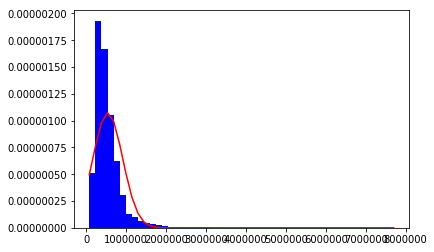

In [1313]:
''' Normalize independent variables '''
''' Target variable: price '''
mu = train_csv.price.mean()
std = train_csv.price.std()
print('mu: ', mu, 'std: ', std)

n, bins, patches = plt.hist(train_csv.price, 50, density=1, color='blue')
y = scipy.stats.norm.pdf(bins, mu, std)
plt.plot(bins, y, 'r-')
plt.show()


mu:  13.048122301866249 std:  0.5274533608586442


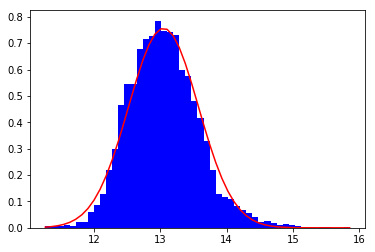

In [1314]:
''' Normalize the target variable '''
log_price = np.log1p(train_csv.price)
log_mu = np.mean(log_price)
log_std = np.std(log_price)
print('mu: ', log_mu, 'std: ', log_std)

n, bins, patches = plt.hist(log_price, 50, density = 1, color = 'blue')
y = scipy.stats.norm.pdf(bins, log_mu, log_std)
plt.plot(bins, y, 'r-')
plt.show()

In [1315]:
'''Replace target variable'''
train_csv.price = log_price

In [1316]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


In [1317]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
id               6468 non-null int64
date             6468 non-null object
bedrooms         6468 non-null int64
bathrooms        6468 non-null float64
sqft_living      6468 non-null int64
sqft_lot         6468 non-null int64
floors           6468 non-null float64
waterfront       6468 non-null int64
view             6468 non-null int64
condition        6468 non-null int64
grade            6468 non-null int64
sqft_above       6468 non-null int64
sqft_basement    6468 non-null int64
yr_built         6468 non-null int64
yr_renovated     6468 non-null int64
zipcode          6468 non-null int64
lat              6468 non-null float64
long             6468 non-null float64
sqft_living15    6468 non-null int64
sqft_lot15       6468 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 1010.7+ KB


In [1318]:
''' 
There are no missing values in both train and test set.
There is only one object type data in both train and test set.
'''

' \nThere are no missing values in both train and test set.\nThere is only one object type data in both train and test set.\n'

In [1319]:
'''
Combine train and test set
'''

'\nCombine train and test set\n'

In [1320]:
all_set_csv = pd.concat([train_csv, test_csv], sort=True)

In [1321]:
all_set_csv.head(20)

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,price,...,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
0,1.00,3,3,20141013T000000,1.0,7,0,47.5112,-122.257,12.309987,...,0,1180,1340,5650,5650,0,0,1955,0,98178
1,1.00,2,3,20150225T000000,1.0,6,1,47.7379,-122.233,12.100718,...,0,770,2720,10000,8062,0,0,1933,0,98028
2,2.00,3,3,20150218T000000,1.0,8,2,47.6168,-122.045,13.142168,...,0,1680,1800,8080,7503,0,0,1987,0,98074
3,2.25,3,3,20140627T000000,2.0,7,3,47.3097,-122.327,12.458779,...,0,1715,2238,6819,6819,0,0,1995,0,98003
4,1.50,3,3,20150115T000000,1.0,7,4,47.4095,-122.315,12.583999,...,0,1060,1650,9711,9711,0,0,1963,0,98198
5,2.50,3,3,20150403T000000,1.0,8,5,47.6007,-122.145,13.403777,...,1700,3560,2210,9796,8925,0,0,1965,0,98007
6,1.00,2,4,20140527T000000,1.0,7,6,47.6900,-122.292,13.056226,...,300,1160,1330,6000,6000,0,0,1942,0,98115
7,1.00,3,4,20140528T000000,1.5,7,7,47.7558,-122.229,12.644331,...,0,1430,1780,19901,12697,0,0,1927,0,98028
8,1.75,3,4,20141007T000000,1.0,7,8,47.6127,-122.045,12.899222,...,0,1370,1370,9680,10208,0,0,1977,0,98074
9,2.00,5,3,20150312T000000,1.5,7,9,47.6700,-122.394,13.180634,...,0,1810,1360,4850,4850,0,0,1900,0,98107


In [1322]:
all_set_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 6467
Data columns (total 21 columns):
bathrooms        21503 non-null float64
bedrooms         21503 non-null int64
condition        21503 non-null int64
date             21503 non-null object
floors           21503 non-null float64
grade            21503 non-null int64
id               21503 non-null int64
lat              21503 non-null float64
long             21503 non-null float64
price            15035 non-null float64
sqft_above       21503 non-null int64
sqft_basement    21503 non-null int64
sqft_living      21503 non-null int64
sqft_living15    21503 non-null int64
sqft_lot         21503 non-null int64
sqft_lot15       21503 non-null int64
view             21503 non-null int64
waterfront       21503 non-null int64
yr_built         21503 non-null int64
yr_renovated     21503 non-null int64
zipcode          21503 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.6+ MB


In [1323]:
'''
Data
condition, grade, view, bathrooms, bedrooms, floors, sqft_above, sqft_basement, sqft_living, sqft_living15, 
sqft_lot, sqft_living15, waterfront, zipcode, lat, long, yr_built, yr_renovated, date (object)

'''

'\nData\ncondition, grade, view, bathrooms, bedrooms, floors, sqft_above, sqft_basement, sqft_living, sqft_living15, \nsqft_lot, sqft_living15, waterfront, zipcode, lat, long, yr_built, yr_renovated, date (object)\n\n'

In [1324]:
'''
Change object type data to numerical
'''

'\nChange object type data to numerical\n'

In [1325]:
all_set_csv['date'] = all_set_csv['date'].str.slice(0,6).astype('int')

In [1326]:
all_set_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 6467
Data columns (total 21 columns):
bathrooms        21503 non-null float64
bedrooms         21503 non-null int64
condition        21503 non-null int64
date             21503 non-null int32
floors           21503 non-null float64
grade            21503 non-null int64
id               21503 non-null int64
lat              21503 non-null float64
long             21503 non-null float64
price            15035 non-null float64
sqft_above       21503 non-null int64
sqft_basement    21503 non-null int64
sqft_living      21503 non-null int64
sqft_living15    21503 non-null int64
sqft_lot         21503 non-null int64
sqft_lot15       21503 non-null int64
view             21503 non-null int64
waterfront       21503 non-null int64
yr_built         21503 non-null int64
yr_renovated     21503 non-null int64
zipcode          21503 non-null int64
dtypes: float64(5), int32(1), int64(15)
memory usage: 3.5 MB


In [1327]:
'''
Features to be added
date -> year,month
floors -> floors, with_loft
sqft_basement -> with_basement
yr_renovated -> renovated
sqft_living15 + sqft_living -> living_greater 
sqft_lot15 + sqft_lot -> lot_greater
'''

'\nFeatures to be added\ndate -> year,month\nfloors -> floors, with_loft\nsqft_basement -> with_basement\nyr_renovated -> renovated\nsqft_living15 + sqft_living -> living_greater \nsqft_lot15 + sqft_lot -> lot_greater\n'

In [1328]:
'''date -> year, month '''
all_set_csv['year'] = all_set_csv['date'].astype(str).str.slice(0,4).astype(int)
all_set_csv['month'] = all_set_csv['date'].astype(str).str.slice(4,6).astype(int)


In [1329]:
''' group month to season '''
conditions = [((all_set_csv['month']==12) | (all_set_csv['month']==1) | (all_set_csv['month']==2)),
              ((all_set_csv['month']==3) | (all_set_csv['month']==4) | (all_set_csv['month']==5)),
              ((all_set_csv['month']==6) | (all_set_csv['month']==7) | (all_set_csv['month']==8))]
choices = ['winter','spring','summer']
all_set_csv['season'] = np.select(conditions, choices, default = 'fall')
all_set_csv.drop('month',axis=1, inplace=True)

In [1330]:
''' season to dummies '''
all_set_csv = pd.concat([all_set_csv.drop('season',axis=1), pd.get_dummies(all_set_csv['season']).astype(int)], axis=1)

# avoid dummy variable trap
#all_set_csv.drop('fall', axis=1, inplace=True)


In [1331]:
all_set_csv.head()

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,price,...,view,waterfront,yr_built,yr_renovated,zipcode,year,fall,spring,summer,winter
0,1.00,3,3,201410,1.0,7,0,47.5112,-122.257,12.309987,...,0,0,1955,0,98178,2014,1,0,0,0
1,1.00,2,3,201502,1.0,6,1,47.7379,-122.233,12.100718,...,0,0,1933,0,98028,2015,0,0,0,1
2,2.00,3,3,201502,1.0,8,2,47.6168,-122.045,13.142168,...,0,0,1987,0,98074,2015,0,0,0,1
3,2.25,3,3,201406,2.0,7,3,47.3097,-122.327,12.458779,...,0,0,1995,0,98003,2014,0,0,1,0
4,1.50,3,3,201501,1.0,7,4,47.4095,-122.315,12.583999,...,0,0,1963,0,98198,2015,0,0,0,1


In [1332]:
all_set_csv.dtypes

bathrooms        float64
bedrooms           int64
condition          int64
date               int32
floors           float64
grade              int64
id                 int64
lat              float64
long             float64
price            float64
sqft_above         int64
sqft_basement      int64
sqft_living        int64
sqft_living15      int64
sqft_lot           int64
sqft_lot15         int64
view               int64
waterfront         int64
yr_built           int64
yr_renovated       int64
zipcode            int64
year               int32
fall               int32
spring             int32
summer             int32
winter             int32
dtype: object

In [1333]:
''' floors -> floors, with_loft'''
all_set_csv['with_loft'] = np.select([all_set_csv['floors'].astype(str).str.slice(2,3) == '5'],[1],default=0)
all_set_csv['floors'] = all_set_csv['floors'].astype(str).str.slice(0,1).astype(int)

print(all_set_csv.with_loft.value_counts() ,'\n', all_set_csv.floors.value_counts())


0    19439
1     2064
Name: with_loft, dtype: int64 
 1    12507
2     8377
3      619
Name: floors, dtype: int64


In [1334]:
'''sqft_basement -> with_basement '''
all_set_csv['with_basement'] = np.select([all_set_csv['sqft_basement'] > 0], [1], default=0)
all_set_csv.with_basement.value_counts()


0    13056
1     8447
Name: with_basement, dtype: int64

In [1335]:
'''yr_renovated -> renovated '''
all_set_csv['renovated'] = np.select([all_set_csv['yr_renovated'] > 0], [1], default = 0)
all_set_csv.renovated.value_counts()


0    20590
1      913
Name: renovated, dtype: int64

In [1336]:
''' sqft_living15 + sqft_living -> living_greater '''
all_set_csv['living_greater'] = np.select([all_set_csv['sqft_living'] > all_set_csv['sqft_living15']], [1], default=0)
all_set_csv.living_greater.value_counts()


0    11700
1     9803
Name: living_greater, dtype: int64

In [1337]:
''' sqft_lot15 + sqft_lot -> lot_greater '''
all_set_csv['lot_greater'] = np.select([all_set_csv['sqft_lot'] > all_set_csv['sqft_lot15']], [1], default=0)
all_set_csv.lot_greater.value_counts()


0    12953
1     8550
Name: lot_greater, dtype: int64

In [1338]:
''' add per_sqft_living_price '''
all_set_csv['per_sqft_living_price']=np.expm1(all_set_csv[all_set_csv['price']>0]['price'])/all_set_csv[all_set_csv['price']>0]['sqft_living']
all_set_csv.drop('sqft_living', axis=1, inplace=True)

In [1339]:
''' add per_sqft_lot_price '''
all_set_csv['per_sqft_lot_price'] = np.expm1(all_set_csv[all_set_csv['price']>0]['price'])/all_set_csv[all_set_csv['price']>0]['sqft_lot']
all_set_csv.drop('sqft_lot', axis=1, inplace=True)

In [1340]:
all_set_csv.head()

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,price,...,spring,summer,winter,with_loft,with_basement,renovated,living_greater,lot_greater,per_sqft_living_price,per_sqft_lot_price
0,1.00,3,3,201410,1,7,0,47.5112,-122.257,12.309987,...,0,0,0,0,0,0,0,0,188.050847,39.274336
1,1.00,2,3,201502,1,6,1,47.7379,-122.233,12.100718,...,0,0,1,0,0,0,0,1,233.766234,18.000000
2,2.00,3,3,201502,1,8,2,47.6168,-122.045,13.142168,...,0,0,1,0,0,0,0,1,303.571429,63.118812
3,2.25,3,3,201406,2,7,3,47.3097,-122.327,12.458779,...,0,1,0,0,0,0,0,0,150.145773,37.762135
4,1.50,3,3,201501,1,7,4,47.4095,-122.315,12.583999,...,0,0,1,0,0,0,0,0,275.330189,30.053548


In [1341]:
'''
Featues to be dropped
date, sqft_basement, sqft_above (because sqft_living = sqft_basement + sqft_above)
sqft_living15, sqft_lot15, yr_renovated
'''

'\nFeatues to be dropped\ndate, sqft_basement, sqft_above (because sqft_living = sqft_basement + sqft_above)\nsqft_living15, sqft_lot15, yr_renovated\n'

In [1342]:
all_set_csv.drop(['date','sqft_basement','sqft_above','sqft_living15','sqft_lot15','yr_renovated'], axis=1, inplace=True)

In [1343]:
all_set_csv.head()

,bathrooms,bedrooms,condition,floors,grade,id,lat,long,price,view,...,spring,summer,winter,with_loft,with_basement,renovated,living_greater,lot_greater,per_sqft_living_price,per_sqft_lot_price
0,1.00,3,3,1,7,0,47.5112,-122.257,12.309987,0,...,0,0,0,0,0,0,0,0,188.050847,39.274336
1,1.00,2,3,1,6,1,47.7379,-122.233,12.100718,0,...,0,0,1,0,0,0,0,1,233.766234,18.000000
2,2.00,3,3,1,8,2,47.6168,-122.045,13.142168,0,...,0,0,1,0,0,0,0,1,303.571429,63.118812
3,2.25,3,3,2,7,3,47.3097,-122.327,12.458779,0,...,0,1,0,0,0,0,0,0,150.145773,37.762135
4,1.50,3,3,1,7,4,47.4095,-122.315,12.583999,0,...,0,0,1,0,0,0,0,0,275.330189,30.053548


In [1344]:
# Train set and Test set
train_set = all_set_csv.iloc[:len(train_csv),:]
test_set = all_set_csv.iloc[len(train_csv):, :]

print("Train set:", train_set.shape, "\n Test set:", test_set.shape)

Train set: (15035, 25) 
 Test set: (6468, 25)


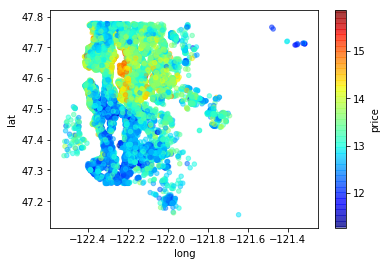

In [1345]:
all_set_csv[all_set_csv['price']>0].plot(kind='scatter', x='long', y='lat', alpha=0.5, 
                 c='price', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)

In [1346]:
x_cluster = all_set_csv[all_set_csv['price']>0].iloc[:,5:9].values

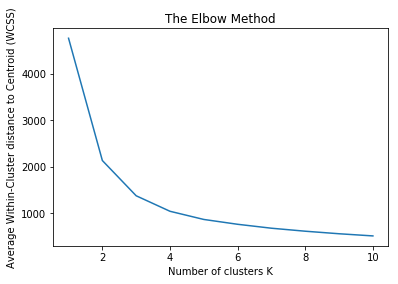

In [1347]:
from sklearn.cluster import KMeans
dist = []
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state= 0)
    kmeans.fit(x_cluster[:,1:4])
    dist.append(kmeans.inertia_)
plt.plot(range(1, 11),dist)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('Average Within-Cluster distance to Centroid (WCSS)')  
plt.show()


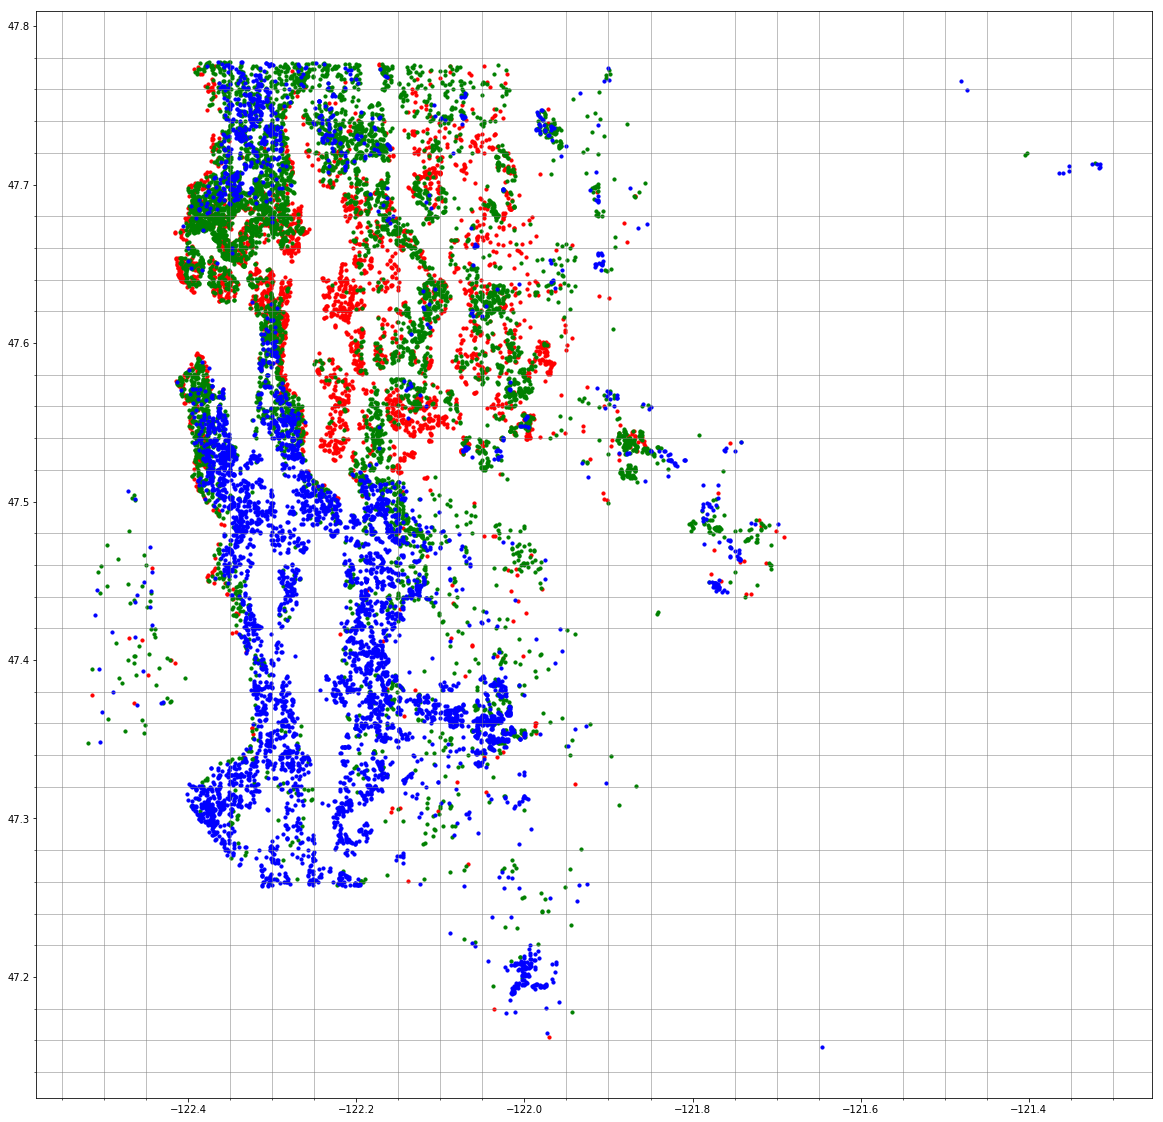

In [1348]:
kmeans=KMeans(n_clusters=3, init='k-means++',random_state= 0)
y_kmeans=kmeans.fit_predict(x_cluster[:,1:4])

# Visualizing the clusters
fig, ax = plt.subplots(figsize=(20,20))
#ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True)
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle='-', linewidth='0.5', color= 'grey')
plt.scatter(x_cluster[y_kmeans == 0, 2], x_cluster[y_kmeans == 0, 1], s = 10, c = 'red')
plt.scatter(x_cluster[y_kmeans == 1, 2], x_cluster[y_kmeans == 1, 1], s = 10, c = 'green')
plt.scatter(x_cluster[y_kmeans == 2, 2], x_cluster[y_kmeans == 2, 1], s = 10, c = 'blue')
plt.grid()
plt.show()

In [1349]:
conditions = [((all_set_csv['lat']<47.52) | 
              ((all_set_csv['long']>= -122.4) & (all_set_csv['long']< -122.25) & 
               (all_set_csv['lat']>=47.52) & (all_set_csv['lat']<=47.58)) |
              ((all_set_csv['long']>= -122.35) & (all_set_csv['long']<= -122.3) & 
               (all_set_csv['lat']>=47.72) & (all_set_csv['lat']<= 47.78))),
              (((all_set_csv['long']>=-122.25) & (all_set_csv['long']<=-122.1) & 
               (all_set_csv['lat']>=47.52) & (all_set_csv['lat'] <= 47.58)) |
               ((all_set_csv['long']>=-122.25) & (all_set_csv['long']<=-122.15) & 
               (all_set_csv['lat']>=47.58) & (all_set_csv['lat'] <= 47.66)) |
              ((all_set_csv['long']>=-122.35) & (all_set_csv['long']<=-122.25) & 
               (all_set_csv['lat']>=47.62) & (all_set_csv['lat'] <= 47.66)) |
              ((all_set_csv['long']>=-122.0) & (all_set_csv['long']<=-121.95) & 
               (all_set_csv['lat']>=47.58) & (all_set_csv['lat'] <= 47.6)))
              ]
choices = ['blue','red']
all_set_csv['cluster'] = np.select(conditions, choices, default = 'green')
all_set_csv.cluster.value_counts()


blue     9782
green    9523
red      2198
Name: cluster, dtype: int64

In [1350]:
all_set_csv.dtypes

bathrooms                float64
bedrooms                   int64
condition                  int64
floors                     int32
grade                      int64
id                         int64
lat                      float64
long                     float64
price                    float64
view                       int64
waterfront                 int64
yr_built                   int64
zipcode                    int64
year                       int32
fall                       int32
spring                     int32
summer                     int32
winter                     int32
with_loft                  int32
with_basement              int32
renovated                  int32
living_greater             int32
lot_greater                int32
per_sqft_living_price    float64
per_sqft_lot_price       float64
cluster                   object
dtype: object

In [1351]:
all_set_csv = pd.concat([all_set_csv.drop('cluster', axis=1), pd.get_dummies(all_set_csv['cluster']).astype(int)], axis=1)
all_set_csv.drop('green',axis=1, inplace=True)

In [1352]:
all_set_csv.drop(['lat','long'], axis=1, inplace=True)

In [1353]:
all_set_csv.head()

,bathrooms,bedrooms,condition,floors,grade,id,price,view,waterfront,yr_built,...,winter,with_loft,with_basement,renovated,living_greater,lot_greater,per_sqft_living_price,per_sqft_lot_price,blue,red
0,1.00,3,3,1,7,0,12.309987,0,0,1955,...,0,0,0,0,0,0,188.050847,39.274336,1,0
1,1.00,2,3,1,6,1,12.100718,0,0,1933,...,1,0,0,0,0,1,233.766234,18.000000,0,0
2,2.00,3,3,1,8,2,13.142168,0,0,1987,...,1,0,0,0,0,1,303.571429,63.118812,0,0
3,2.25,3,3,2,7,3,12.458779,0,0,1995,...,0,0,0,0,0,0,150.145773,37.762135,1,0
4,1.50,3,3,1,7,4,12.583999,0,0,1963,...,1,0,0,0,0,0,275.330189,30.053548,1,0


In [1354]:
all_set_csv.dtypes

bathrooms                float64
bedrooms                   int64
condition                  int64
floors                     int32
grade                      int64
id                         int64
price                    float64
view                       int64
waterfront                 int64
yr_built                   int64
zipcode                    int64
year                       int32
fall                       int32
spring                     int32
summer                     int32
winter                     int32
with_loft                  int32
with_basement              int32
renovated                  int32
living_greater             int32
lot_greater                int32
per_sqft_living_price    float64
per_sqft_lot_price       float64
blue                       int32
red                        int32
dtype: object

In [1359]:
import statsmodels.api as sm
model = sm.OLS(all_set_csv[all_set_csv['price']>0].price, all_set_csv[all_set_csv['price']>0].drop(['id','price','waterfront'],axis=1))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     5529.
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:10:00   Log-Likelihood:                 4576.1
No. Observations:               15035   AIC:                            -9108.
Df Residuals:                   15013   BIC:                            -8941.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bathrooms                 0.12

In [1183]:

# Train set and Test set
train_set = all_set_csv.iloc[:len(train_csv),:]
test_set = all_set_csv.iloc[len(train_csv):, :]

print("Train set:", train_set.shape, "\n Test set:", test_set.shape)

Train set: (15035, 24) 
 Test set: (6468, 24)


In [1184]:
''' Divide into train and test set '''
y_train = train_set.price.copy()
test_id = test_set.id
x_train = train_set.drop(['id', 'price'], axis=1).copy()
x_test = test_set.drop(['id','price'], axis=1).copy()

In [1185]:
''' Feature Scaling '''
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_x = StandardScaler() # PCA, clustering, logistic regression, SVMs, perceptrons, neural networks
#sc_x = MinMaxScaler()
x_train_df = pd.DataFrame(sc_x.fit_transform(x_train), columns=x_train.columns)
x_test_df = pd.DataFrame(sc_x.transform(x_test), columns=x_test.columns)


C:\Users\donny\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\donny\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\donny\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  


In [1186]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif['VIF_Factor'] = [variance_inflation_factor(
                x_train_df.values, i) for i in range(x_train_df.shape[1])]
vif['features'] = x_train_df.columns

'''
vif['VIF_Factor'] = [variance_inflation_factor(
                x_train_df.drop(['zipcode'],axis=1).values, i) for i in range(x_train_df.drop(['zipcode'], axis=1).shape[1])]
vif['features'] = x_train_df.drop(['zipcode'],axis=1).columns

vif['VIF_Factor'] = [variance_inflation_factor(
                x_train.drop(['zipcode','year'],axis=1).values, i) for i in range(x_train.drop(['zipcode','year'], axis=1).shape[1])]
vif['features'] = x_train.drop(['zipcode','year'],axis=1).columns

vif['VIF_Factor'] = [variance_inflation_factor(
                x_train.drop(['zipcode','year','long'],axis=1).values, i) for i in range(x_train.drop(['zipcode','year','long'], axis=1).shape[1])]
vif['features'] = x_train.drop(['zipcode','year','long'],axis=1).columns

vif['VIF_Factor'] = [variance_inflation_factor(
                x_train.drop(['zipcode','year','long','lat'],axis=1).values, i) for i in range(x_train.drop(['zipcode','year','long','lat'], axis=1).shape[1])]
vif['features'] = x_train.drop(['zipcode','year','long','lat'],axis=1).columns
'''
print(vif.sort_values(by='VIF_Factor', ascending=False))

    VIF_Factor               features
7     3.007338               yr_built
0     2.992786              bathrooms
3     2.840337                 floors
10    2.694669                 spring
18    2.584588  per_sqft_living_price
19    2.370317     per_sqft_lot_price
4     2.347858                  grade
9     2.181938                   year
12    1.941726                 winter
1     1.676481               bedrooms
20    1.651531                   blue
14    1.617732          with_basement
11    1.594219                 summer
8     1.461464                zipcode
5     1.370326                   view
21    1.354088                    red
16    1.346493         living_greater
13    1.306636              with_loft
2     1.263384              condition
6     1.228212             waterfront
15    1.156494              renovated
17    1.063641            lot_greater


In [1187]:
all_set_csv[all_set_csv['price']>0].corr(method='pearson').price.sort_values(ascending=False)

price                    1.000000
grade                    0.707412
per_sqft_living_price    0.581351
bathrooms                0.552000
red                      0.416345
bedrooms                 0.359946
per_sqft_lot_price       0.355388
view                     0.347506
floors                   0.294176
living_greater           0.257205
with_basement            0.207726
waterfront               0.172580
renovated                0.127241
yr_built                 0.076293
with_loft                0.061565
lot_greater              0.057863
condition                0.042947
id                       0.035940
spring                   0.035914
summer                   0.009998
year                     0.009913
winter                  -0.031041
zipcode                 -0.039195
blue                    -0.589003
Name: price, dtype: float64

In [1188]:
all_set_csv.head()

,bathrooms,bedrooms,condition,floors,grade,id,price,view,waterfront,yr_built,...,winter,with_loft,with_basement,renovated,living_greater,lot_greater,per_sqft_living_price,per_sqft_lot_price,blue,red
0,1.00,3,3,1,7,0,12.309987,0,0,1955,...,0,0,0,0,0,0,188.050847,39.274336,1,0
1,1.00,2,3,1,6,1,12.100718,0,0,1933,...,1,0,0,0,0,1,233.766234,18.000000,0,0
2,2.00,3,3,1,8,2,13.142168,0,0,1987,...,1,0,0,0,0,1,303.571429,63.118812,0,0
3,2.25,3,3,2,7,3,12.458779,0,0,1995,...,0,0,0,0,0,0,150.145773,37.762135,1,0
4,1.50,3,3,1,7,4,12.583999,0,0,1963,...,1,0,0,0,0,0,275.330189,30.053548,1,0


In [1189]:
# Split train and test set from train
x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(x_train_df, y_train, test_size=0.3, random_state=0)


In [1190]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

at  1  :  0.2901794976780454
at  3  :  0.24573055652577944
at  5  :  0.23686814031373318
at  7  :  0.2358537402771227
at  9  :  0.23538300073670715


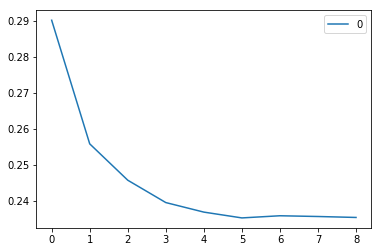

In [1191]:
# Knn Regresssor
# find the best number of k
rmse = []
for k in range(1,10):
    knn_regressor = KNeighborsRegressor(n_neighbors = k)
    knn_regressor.fit(x_train_set, y_train_set.values)
    y_pred = knn_regressor.predict(x_test_set)
    error = sqrt(mean_squared_error(y_test_set, y_pred))
    rmse.append(error)
    if k%2 == 1:
        print('at ', k, ' : ', error)
    
graph = pd.DataFrame(rmse)
graph.plot()


0.7869505495736248
RMSE:  0.24573055652577944


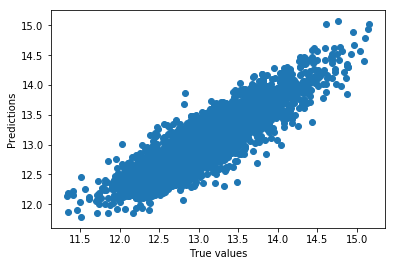

In [1192]:
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(x_train_set, y_train_set.values)
y_pred = knn_reg.predict(x_test_set)
print(knn_reg.score(x_test_set, y_test_set))
print('RMSE: ', sqrt(mean_squared_error(y_test_set, y_pred)))

plt.scatter(y_test_set, y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

''' prediction on x_test'''
rd_forest.fit(x_train_df, y_train)
y_pred = rd_forest.predict(x_test_df)

0.9090895858568954
RMSE:  0.1605187515141424


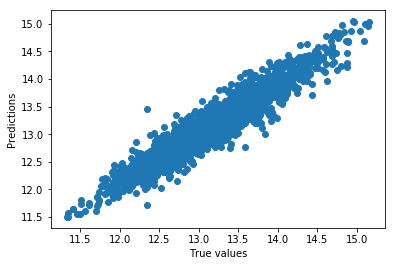

In [1193]:
# Random Forest
rd_forest = RandomForestRegressor(n_estimators=100)
rd_forest.fit(x_train_set, y_train_set)
y_pred = rd_forest.predict(x_test_set)
print(rd_forest.score(x_test_set, y_test_set))
print('RMSE: ', sqrt(mean_squared_error(y_test_set, y_pred)))

plt.scatter(y_test_set, y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

''' prediction on x_test'''
rd_forest.fit(x_train_df, y_train)
y_pred = rd_forest.predict(x_test_df)

In [1194]:
submission = pd.DataFrame({
                           'id': test_id,
                           'price': np.around(np.expm1(y_pred),decimals=1)
                           })
submission.to_csv('submission.csv', index=False)